# UnobservedComponents Example

In this notebook, we have developed code to show an example of how to obtain and plot the estimated unobserved components of a UnobservedComponentsGAS model.

## Importing packages

In [ ]:
import Pkg
Pkg.add(url = "https://github.com/LAMPSPUC/UnobservedComponentsGAS.git")

using UnobservedComponentsGAS, Plots, CSV, DataFrames

## Reading Airline Passengers dataset 

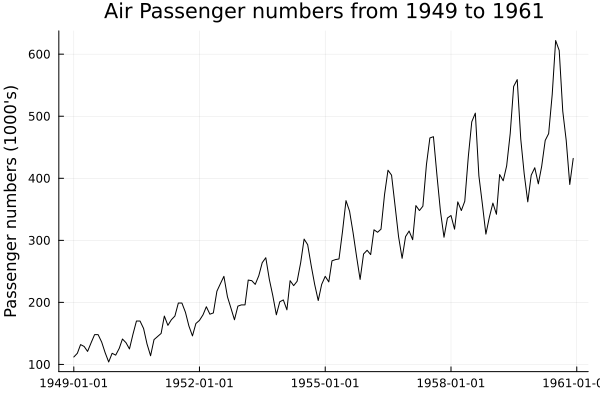

In [2]:
data = CSV.read("data/airline-passengers.csv", DataFrame)
dates = data.Date
y = data.Value

plot(dates, y, color = "black", legend = false)
title!("Air Passenger numbers from 1949 to 1961")
yaxis!("Passenger numbers (1000's)")

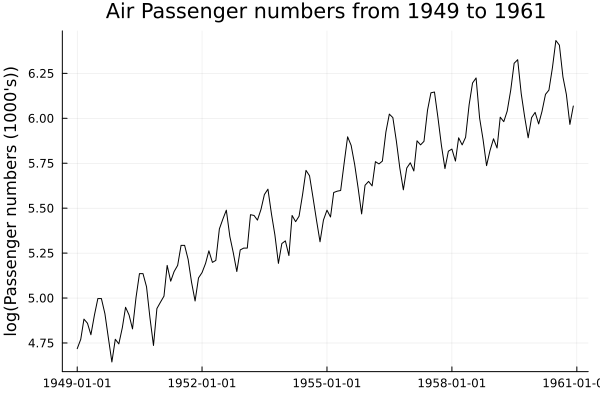

In [10]:
plot(dates, log.(y), color = "black", legend = false)
title!("Air Passenger numbers from 1949 to 1961")
yaxis!("log(Passenger numbers (1000's))")

## Defining and estimating a Score-Driven Model

Model specifications:
 - Distribution: Normal
 - Only the mean parameter as time varying
 - d = 1
 - level component: random walk with slope process
 - seasonality component: stochastic with 12 seasonal periods (monthly seasonality)
 - ar component: missing

Note that, in this example, we have delibarately chosen to implement a Normal model using the logarithm of the time series. However, one could choose to implement directly a LogNormal model.

In [3]:
dist = UnobservedComponentsGAS.NormalDistribution();

time_varying_params = [true, false];
d                   = 1.0;
level               = ["random walk slope", ""];
seasonality         = ["stochastic 12", ""];
ar                  = missing
sample_robustness   = false;

model = UnobservedComponentsGAS.GASModel(dist, time_varying_params, d, level, seasonality, ar)

UnobservedComponentsGAS.GASModel(UnobservedComponentsGAS.NormalDistribution(missing, missing), Bool[1, 0], 1.0, ["random walk slope", ""], ["stochastic 12", ""], [missing, missing])

## Fit model

In [ ]:
fitted_model = UnobservedComponentsGAS.fit(model, log.(y); α = 0.0, robust = sample_robustness, initial_values = missing);

## Analyzing model's components

### Level component - Random Walk 

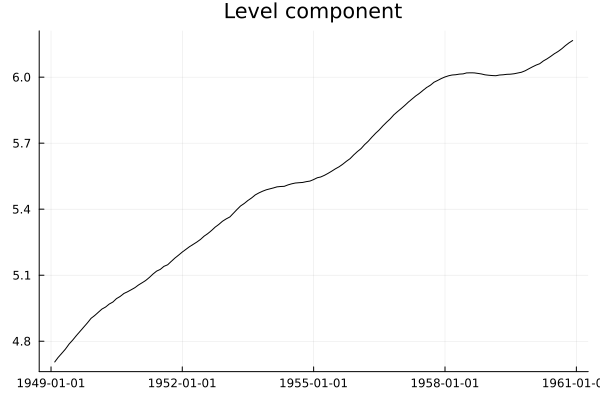

In [6]:
level = fitted_model.components["param_1"]["level"]["value"]

p1 = plot(dates[2:end], level[2:end], color = "black", legend = false)
     title!("Level component")

### Slope Component - Slope of the Random Walk component

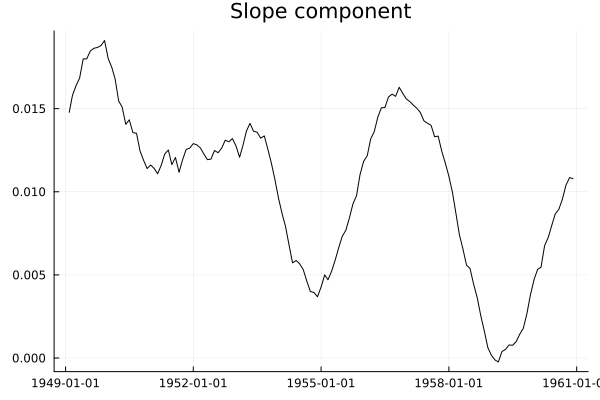

In [7]:
slope = fitted_model.components["param_1"]["slope"]["value"]

p2 = plot(dates[2:end], slope[2:end], color = "black", legend = false)
     title!("Slope component")

### Seasonality Component - Stochastic seasonal component

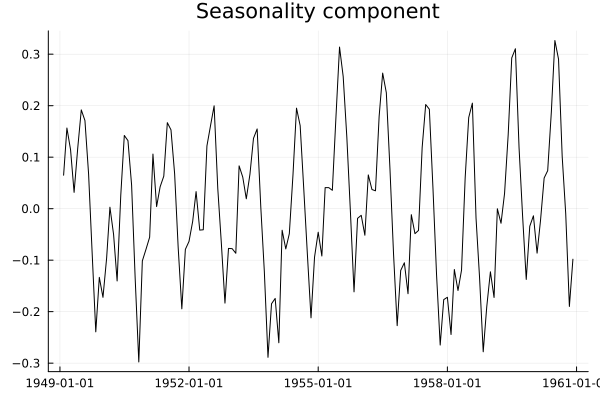

In [8]:
seasonality = fitted_model.components["param_1"]["seasonality"]["value"]

p3 = plot(dates[2:end], seasonality[2:end], color = "black", legend = false)
     title!("Seasonality component")

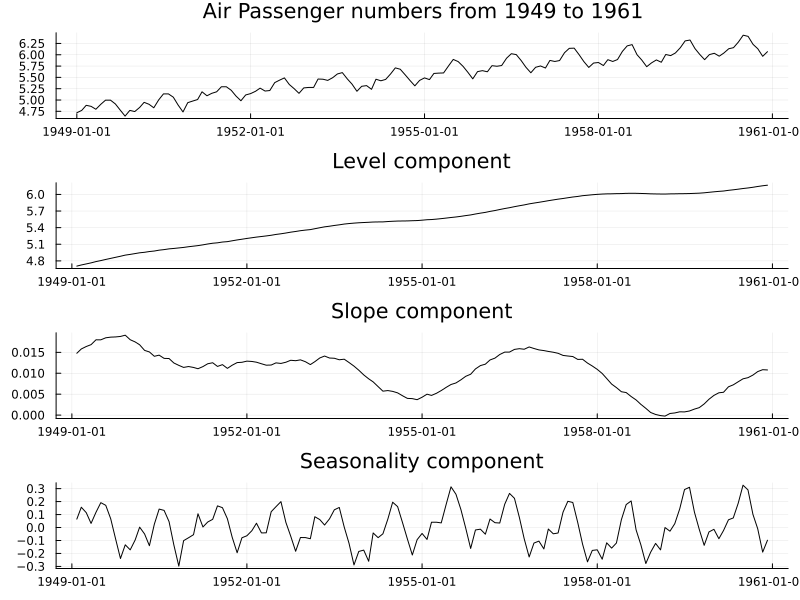

In [14]:
p_series = plot(dates, log.(y), color = "black", legend = false)
p_series = title!("Air Passenger numbers from 1949 to 1961")
plot(p_series, p1,p2, p3, layout=(4, 1), size=(800,600))